In [3]:
import sqlite3 as sq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
DATABASE_PATH = '...'

Age & Gender

In [5]:
conn = sq.connect(DATABASE_PATH)
cur = conn.cursor()

age_data = cur.execute('select age from accounts_user').fetchall()
print(f'age_data: {age_data}')

gender_data = cur.execute('select gender from accounts_user').fetchall()
print(f'gender_data: {gender_data}')

age_data: [(24,), (20,), (40,), (70,), (25,), (45,), (65,), (15,), (35,), (55,), (20,), (40,), (60,), (15,), (35,), (55,)]
gender_data: [('male',), ('female',), ('male',), ('male',), ('male',), ('male',), ('male',), ('male',), ('male',), ('male',), ('female',), ('female',), ('female',), ('female',), ('female',), ('female',)]


<Axes: xlabel='age', ylabel='Count'>

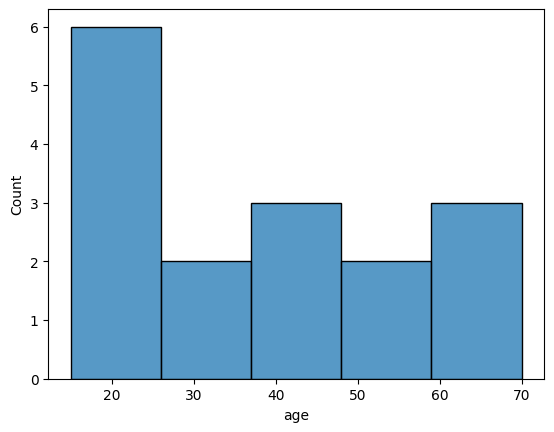

In [6]:
data = {
    'age': [age[0] for age in age_data]
}

sn.histplot(data=data, x='age')  # .set_title(f"{feature} Vs Survived")

([<matplotlib.patches.Wedge at 0x7f9a30fcad40>,
 [Text(0.42095177560159885, 1.0162674857624154, 'young'),
  Text(-1.0788638084435536, -0.2145993542177412, 'adult'),
  Text(0.6111272563215621, -0.9146165735328001, 'elder')],
 [Text(0.22961005941905388, 0.5543277195067721, '37.5%'),
  Text(-0.5884711682419382, -0.11705419320967701, '31.2%'),
  Text(0.3333421398117611, -0.49888176738152723, '31.2%')])

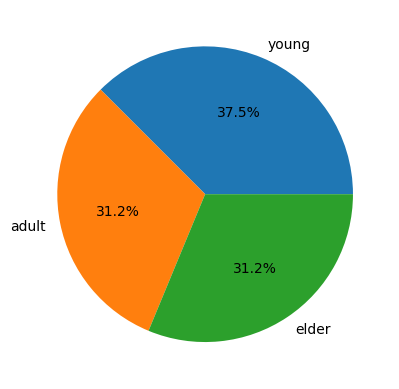

In [35]:
# pie chart plot for yound, adult, elder
labels = 'young', 'adult', 'elder'
sizes = [
    len([1 for age in age_data if age[0] < 30]) / len(age_data),
    len([1 for age in age_data if 30 <= age[0] < 50]) / len(age_data),
    len([1 for age in age_data if age[0] >= 50]) / len(age_data)
]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

<Axes: ylabel='count'>

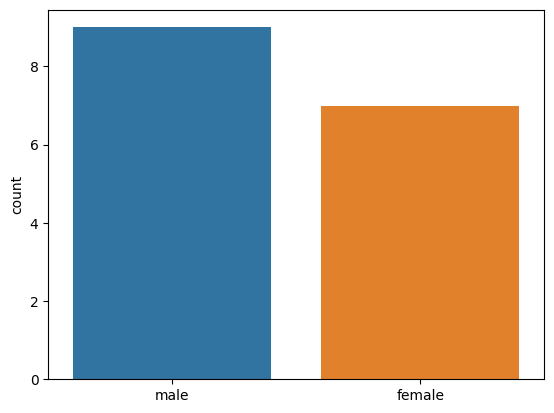

In [7]:
data = {
    'gender': [gender[0] for gender in gender_data]
}

sn.countplot(x = 'gender', data = data)

([<matplotlib.patches.Wedge at 0x7f9a30f4c490>,
 [Text(-0.21459935421774104, 1.0788638084435536, 'male'),
  Text(0.21459935421774115, -1.0788638084435536, 'female')])

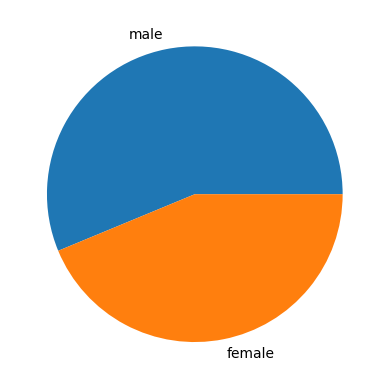

In [33]:
labels = 'male', 'female'
sizes = [
    len([1 for gender in gender_data if gender[0] == 'male']) / len(gender_data),
    len([1 for gender in gender_data if gender[0] == 'female']) / len(gender_data)
]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

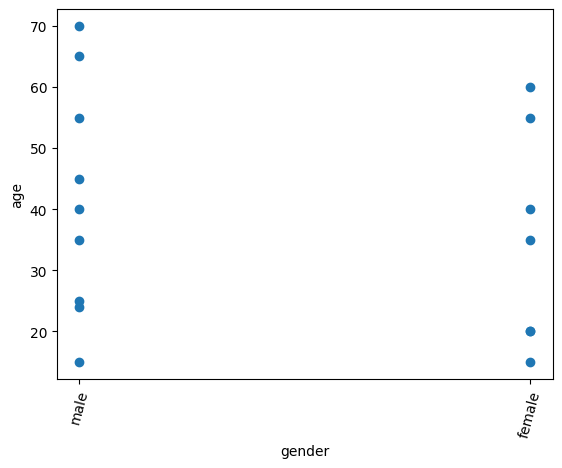

In [36]:
data = {
    'gender': [item[0] for item in gender_data],
    'age': [item[0] for item in age_data]
}
plt.scatter('gender', 'age', data=data)
plt.xlabel('gender')
plt.ylabel('age')
plt.xticks(rotation=75)
plt.show()

Ingredients & Orders

In [8]:
INGREDIENTS = sorted([
    'egg', 'chicken', 'rice', 'tomato', 'cheese', 'potato', 'onion', 'garlic', 'butter', 'corn',
    'lemon', 'cucumber', 'fish', 'pasta', 'spinach', 'ginger', 'parsley', 'carrot', 'cinnamon', 'olives',
    'eggplant', 'mushroom', 'bread', 'beef', 'chocolate', 'apple', 'banana', 'orange', 'broccoli', 'peas'
])

In [9]:
def __extract_ingredients(orders):
    ingredients = []
    for order in orders:
        for i, ingredient in enumerate(INGREDIENTS):
            if ingredient in order:
                ingredients.append(ingredient)

    return ingredients

In [10]:
def get_data():
    def flatten_orders(orders):
      flattened_orders = []
      for order in orders:
          flattened_orders.extend([order[1]]*order[0])
      return flattened_orders

    orders = cur.execute(
        f'''
            SELECT quantity, ingredients
            FROM cart_order
            INNER JOIN pages_meal
            ON cart_order.meal_id = pages_meal.id
        '''
    ).fetchall()

    # repeat by quantity, and keep only ingredients and meal id
    orders = flatten_orders(orders)

    data = __extract_ingredients(orders)

    return data

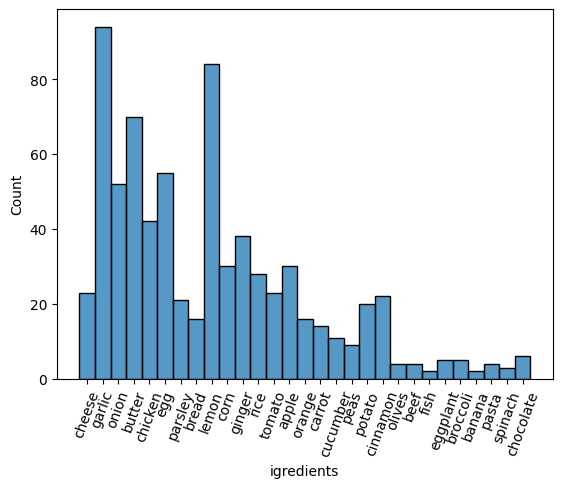

In [11]:
data = {
    'igredients': get_data()
}

plot = sn.histplot(data=data, x='igredients')  # .set_title(f"{feature} Vs Survived")
for item in plot.get_xticklabels():
    item.set_rotation(70)

In [12]:
def get_data():

    meals_ingredients = cur.execute(
        f'''
            SELECT ingredients
            FROM pages_meal
        '''
    ).fetchall()

    print(f'number of meals: {len(meals_ingredients)}')

    meals_ingredients = [ingredients[0] for ingredients in meals_ingredients]
    data = __extract_ingredients(meals_ingredients)

    print(len(data))

    return data

number of meals: 1000
3117


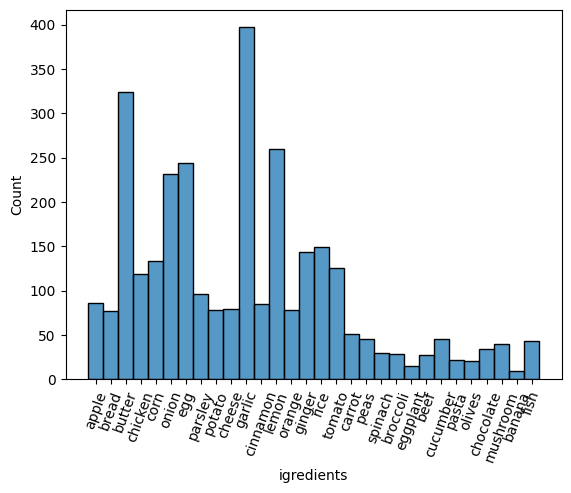

In [13]:
data = {
    'igredients': get_data()
}

plot = sn.histplot(data=data, x='igredients')  # .set_title(f"{feature} Vs Survived")
for item in plot.get_xticklabels():
    item.set_rotation(70)

In [17]:
def get_data():
    def flatten_orders(orders):
      flattened_orders = []
      for order in orders:
          flattened_orders.extend([(order[1], order[2])]*order[0])
      return flattened_orders

    orders = cur.execute(
        f'''
            SELECT quantity, ingredients, age
            FROM cart_order
            INNER JOIN pages_meal
            ON cart_order.meal_id = pages_meal.id
            INNER JOIN accounts_user
            ON cart_order.user_id = accounts_user.id
        '''
    ).fetchall()

    # repeat by quantity, and keep only ingredients and meal id
    orders = flatten_orders(orders)

    data = __extract_ingredients([order[0] for order in orders])
    data = zip(data, [order[1] for order in orders])

    return list(data)

[('cheese', 24), ('garlic', 24), ('onion', 24), ('cheese', 24), ('garlic', 24), ('onion', 24), ('butter', 24), ('chicken', 20), ('egg', 20), ('garlic', 20)]


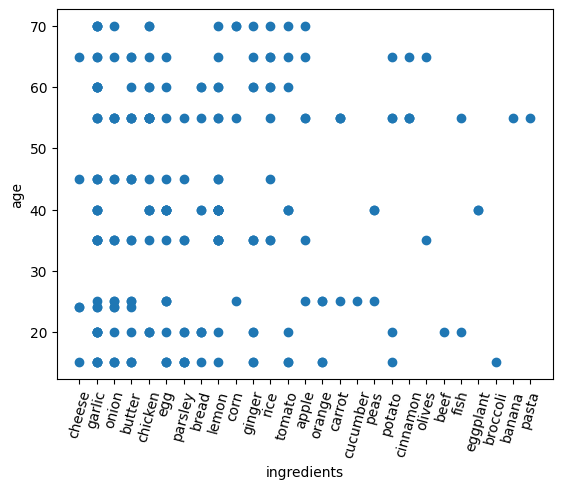

In [23]:
age_ingredients_data = get_data()
print(age_ingredients_data[:10])
data = {
    'ingredients': [item[0] for item in age_ingredients_data],
    'age': [item[1] for item in age_ingredients_data]
}
plt.scatter('ingredients', 'age', data=data)
plt.xlabel('ingredients')
plt.ylabel('age')
plt.xticks(rotation=75)
plt.show()

In [37]:
def get_data():
    def flatten_orders(orders):
      flattened_orders = []
      for order in orders:
          flattened_orders.extend([(order[1], order[2])]*order[0])
      return flattened_orders

    orders = cur.execute(
        f'''
            SELECT quantity, ingredients, gender
            FROM cart_order
            INNER JOIN pages_meal
            ON cart_order.meal_id = pages_meal.id
            INNER JOIN accounts_user
            ON cart_order.user_id = accounts_user.id
        '''
    ).fetchall()

    # repeat by quantity, and keep only ingredients and meal id
    orders = flatten_orders(orders)

    data = __extract_ingredients([order[0] for order in orders])
    data = zip(data, [order[1] for order in orders])

    return list(data)

[('cheese', 'male'), ('garlic', 'male'), ('onion', 'male'), ('cheese', 'male'), ('garlic', 'male'), ('onion', 'male'), ('butter', 'male'), ('chicken', 'female'), ('egg', 'female'), ('garlic', 'female')]


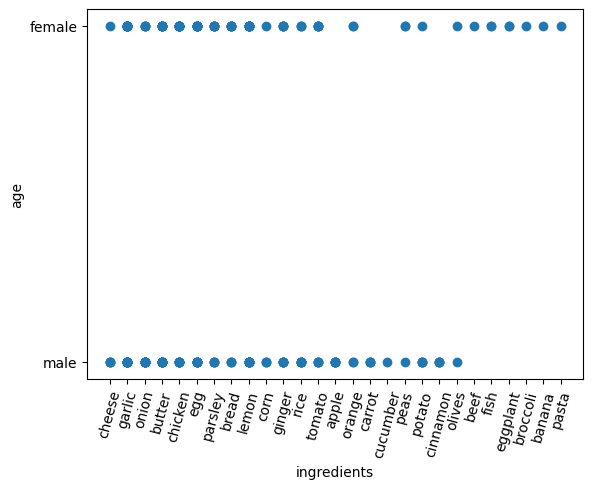

In [44]:
gender_ingredients_data = get_data()
print(gender_ingredients_data[:10])
data = {
    'ingredients': [item[0] for item in gender_ingredients_data],
    'gender': [item[1] for item in gender_ingredients_data]
}
plt.scatter('ingredients', 'gender', data=data)
plt.xlabel('ingredients')
plt.ylabel('age')
plt.xticks(rotation=75)
plt.show()

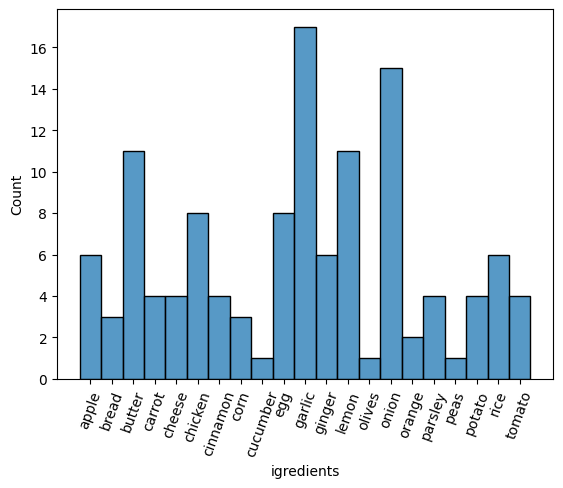

In [51]:
data = {
    'igredients': sorted([order[0] for order in gender_ingredients_data if order[1] == 'male' ])
}

plot = sn.histplot(data=data, x='igredients')  # .set_title(f"{feature} Vs Survived")
for item in plot.get_xticklabels():
    item.set_rotation(70)

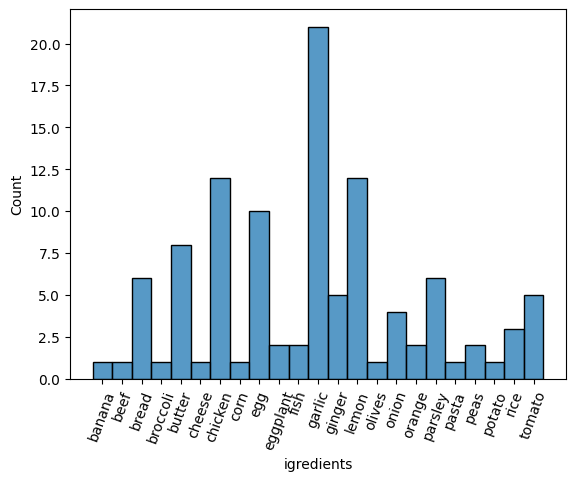

In [52]:
data = {
    'igredients': sorted([order[0] for order in gender_ingredients_data if order[1] == 'female' ])
}

plot = sn.histplot(data=data, x='igredients')  # .set_title(f"{feature} Vs Survived")
for item in plot.get_xticklabels():
    item.set_rotation(70)